# Lab 12: The harmonic series; getting started with FFT

### 22 January 2017

In this lab we will explore the sonic and visual effects of adding together waveforms of different frequencies, and we will start using the FFT.

## Goals ##

After completing this lab, you should:
* Be very comfortable generating sine waves and plotting waveforms in python
* Be able to experiment with adding harmonically related sounds together, deepening your understanding of the perception of harmonic sounds
* compute and visualise the magnitude spectrum for any audio (or other one-dimensional) signal
* look at an equation for a sine wave and sketch out the spectrum on paper

## Before you start ##

This lab <font color=red>requires that you have completed installation of PMC libraries on your machine, following last week's instructions</font> at <a href="https://learn.gold.ac.uk/mod/resource/view.php?id=482072">https://learn.gold.ac.uk/mod/resource/view.php?id=482072</a>

Please finish <font color=red>the "getting started lab" if you haven't already: </font> <a href="https://learn.gold.ac.uk/mod/resource/view.php?id=482084">https://learn.gold.ac.uk/mod/resource/view.php?id=482084</a>


# Part 0. IPython & Sound Review

This lab assumes you have completed the "getting started" lab, the introduction to Jupyter Notebook and to sound creation and visualization. If you need a refresher, that lab can be found at https://learn.gold.ac.uk/mod/resource/view.php?id=482084

To refresh your memory, here is a summary of the commands for creating, plotting, and playing sound waves in IPython:


In [1]:
#create an array, t, whose elements begin at 0 and increase in increments of 1/44100, up to 1
#this is a list of points in time (in seconds)
t = arange(0, 1, 1/44100) 
a = 0.5
f = 100
#create another array, each element of which is the value of a sine wave, computed
#at the corresponding point in time in t
s = a * sin(2*pi*t*f)
#provide a playback bar for playing s as an audio file
play(s)

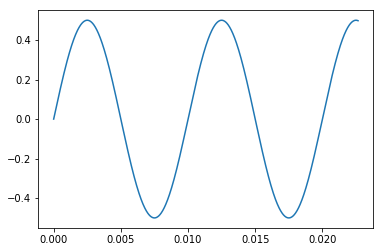

In [6]:
rate = 44100 #44100 Hz
duration = 1 #1 second
amplitude = 0.5
frequency = 100
t = arange(0, duration, 1/rate) #t is an array of equally-spaced time points
s1 = amplitude*sin(2*pi*frequency*t) # s1 is sine wave at 440Hz, amplitude 0.5
play(s1)
plot(t[0:1000], s1[0:1000]) #plots just first 1000 samples of s1

And here is a refresher on how to add two sine waves (to play them simultaneously) or two concatenate them (to play them in sequence):

In [8]:
s2 = 0.5 * sin(2*pi*587.33*t) 
chord = s1 + s2 #plays simultaneously
play(chord)

In [9]:
sequence = concatenate([s1, s2]) #plays in sequence
play(sequence)

# Part 1. The harmonic series

When a series of sinusoids are all integer multiples of the same frequency (called the **fundamental frequency**), we call them **harmonics**. For example, 100Hz, 200Hz, 300Hz, and 400Hz are all harmonics, and the fundamental frequency is 100Hz (namely, they are 1, 2, 3, and 4 times the fundamental). 

**Why is the harmonic series so important?**

**In acoustics: **
1. When we add harmonically-related frequencies together, we will typically hear *just one note*, and the pitch of that note will be equal to the pitch of the fundamental. 

1. The relative amplitudes of the harmonics are important in determining the *timbre* (or "tone colour") of a note.

1. Pitched acoustic instruments (e.g., a bowed violin string, a blown clarinet, a plucked guitar string) vibrate at a fundamental and its harmonics. The strengths of these harmonics are a big part of what differentiates the sound of one instrument from another.

** In computation with _any kind of signal_ (audio, image, animation, ...): **
1. <span style="color:red"> We can add harmonically-related sinusoids with carefully chosen amplitudes and phases together to create any periodic (repeating) waveform. </span>

## i. Playing in sequence

The following code creates a sequence of harmonically-related sines. Make sure you understand how it works, then **edit the number of partials and duration**.


Adding harmonic:  2
Adding harmonic:  3
Adding harmonic:  4
Adding harmonic:  5
Adding harmonic:  6
Adding harmonic:  7
Adding harmonic:  8


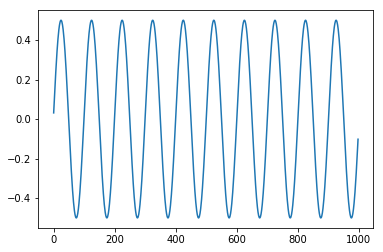

In [33]:
t = arange(0, 0.5, 1/44100)
fundamental = 50
numHarmonics = 8
mySound = 0.5*sin(2*pi*t*4)
for i in range(2,numHarmonics+1) :  #A for-loop where i starts at 2 and ends at numHarmonics
    print "Adding harmonic: ", i
    mySound = concatenate([mySound, 0.5*sin(2*pi*t*fundamental*i)])
    
play(mySound)
plot(mySound[1:1000]) #plot first 1000 samples

## ii. Playing simultaneously

Edit the code below so that, instead of playing one harmonic after the other, you add them together to be **played simultaneously**. *Tip: Don't forget to adjust the gain of each harmonic to ensure that your total gain is no more than 1, otherwise you will get distortion!*

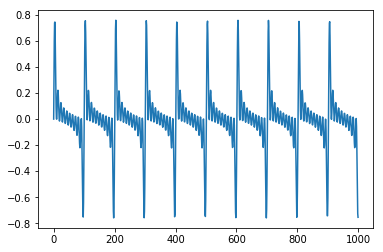

In [71]:
t = arange(0, duration, 1/rate)
duration = 0.5
rate = 44100
fundamental = 440
numHarmonics = 10
mySound =  (1 / numHarmonics) * sin(2*pi*t*fundamental)
for i in range(2,numHarmonics+1) :
    #print "Adding harmonic: ", i
    mySound += (1 / numHarmonics) * sin(2*pi*t*fundamental*i)
    
play(mySound)
plot(mySound[0:1000]) # plot first 1000 samples


### <h2><span style="color:red">Questions for Part 1</span></h2>

Before moving on to Part 2, **answer the following questions**. (You can double-click on this cell and write your answers as text, then hit shift+return to "run" the cell and render the text.)

<div style="color:red">1. How does the sound change as you add more harmonics? (Try from 3 harmonics to up to 10 or more.) <br> 2. How does the plot of the waveform change as you add more harmonics?
</div>

1. The sine wave becomes richer and closer to a sawtooth wave the more harmonics are added.

2. The number of peaks remains the same despite changes in the number of harmonics. The waves within each peak become denser. The sinusoidal shapes become less clear, moving towards a more noise-like appearance with higher harmonic counts.



<hr>
# Aside: Creating a square wave by adding harmonically-related sinusoids

Last term, you used Processing to approximate a square wave by adding harmonically-related sinusoids, each with a carefully chosen frequency and amplitude. 

To create a square wave with any fundamental frequency $f$, the $k^{th}$ sinusoid in your sum will have frequency $(2k-1)\times f$. This $k^{th}$ sinusoid will have amplitude $\frac{1}{(2k-1)}$.

In other words, the final waveform can be expressed by the following summation:

$$ s = \sum_{k=1}^{\infty} \frac{\sin(2\pi(2k-1)ft}{2k-1}$$

The for-loop below generates this sum of sine waves when there are 10 components. 

* Try changing the number of components, and watch and listen how the waveform changes.
* Then, try changing the fundamental, and watch and listen how the waveform changes.
* Finally, try randomly change the _phase_ of each sinusoid (e.g., by using a phase of `rand()*2*pi` for each sin inside your for-loop). (Note that you may have to normalize your waveform to restrict it to the range [-1, 1], by calling `mysound = mysound/max(mysound)` before plotting and playing it, to prevent distortion.)

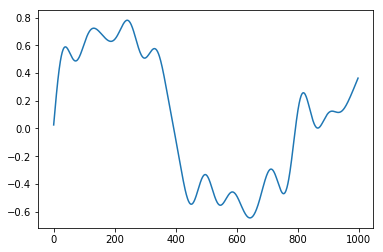

In [109]:
t = arange(0, 0.5, 1/44100)
fundamental = 50
numHarmonics = 10
mySound = sin(2*pi*fundamental*t)
for k in range(2,numHarmonics+1) :
    mySound += (1 / (2*k-1)) * sin(rand()*2*pi*(2*k-1)*fundamental*t)
    
mySound /= max(mySound)
play(mySound)
plot(mySound[1:1000])

## Part 2: Intro to The Fourier Transform##

__Step 1.__ Complete the code below to create a sine wave. Create this wave with a frequency of 2 Hz, an amplitude of 0.5, and a phase offset of 0. Using a sample rate of 100Hz, generate the waveform for 1 second. Store this wave in a variable called `x1`.

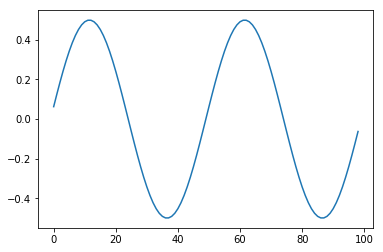

In [119]:
rate = 100
duration = 1
t = arange(0, duration, 1/rate)
a = 0.5
f = 2
x1 = 0.5 * sin(2 * pi * t * f)
plot(x1[1:100])


__Step 2.__ Plot `x1` and verify that it looks like this (note __vertical axis range__):

http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab11/images/x1.png

(Note that you won't be able to hear the wave if you play it, since its frequency is below the range of human hearing, so don't even try.)

If you have trouble doing the above, revisit Part 3 of Lab 11 and work through that until you're confident you can make an arbitrary sine wave signal.

__Step 3.__ Sketch on paper what you think the spectrum should look like for `x1`. Label your x-axis "frequency", and let it range from 0 to 50Hz (the Nyquist rate, the maximum frequency you can accurately represent at 100Hz). Label your y-axis "magnitude," and let it range from 0 upwards (don't worry about units).

If you don't know what the spectrum should look like for `x1`, you might want to take a look back at the slides from week 9 (e.g. slide 26).

__Step 4.__ We'll use the FFT to compute the spectrum of `x1`. To call this in IPython, you'll use the `fft` function, located within the `fft` package. You'll call this function using the syntax `fft.fft()`

For example, to see the documentation about the `fft` __package__, type

In [120]:
?fft

To see the documentation about the `fft` __function__ within this package, type


In [ ]:
?fft.fft

To compute the spectrum of `x1` and store it in a variable called `spec`, just call

In [121]:
spec = fft.fft(x1)

Note that `spec` is an __array of complex numbers__. Note also that Python uses "j" for the imaginary $\sqrt{-1}$, __not__ "i." Make sure you understand what's being done in the following code:

In [122]:
print "The first spectrum element is ", spec[0]
print "The magnitude of the first element is ", abs(spec[0])
print "The length of the spectrum is ", size(spec)

The first spectrum element is  (2.05731406762e-16+0j)
The magnitude of the first element is  2.05731406762e-16
The length of the spectrum is  100


Many functions in python can be applied to an entire array at once, without using a for-loop. `abs()` is one of those functions. 

Therefore, to compute a new array that just contains the __magnitudes__ of each component of the spectrum, call:

In [123]:
magspec = abs(spec)

The magnitude spectrum is just an array of real numbers, so you can plot it using the usual plot command:

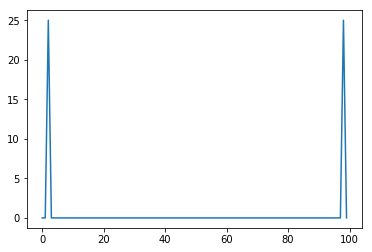

In [124]:
plot(magspec)

__Step 5.__ Does the spectrum you plotted above look like your sketch from step 3? Hopefully it does __NOT!__

Why not? Notice that you've plotted the spectrum for frequencies from 0 to 100Hz (on the x-axis!) However, what you want to plot is the frequencies between 0 and the Nyquist rate of 50Hz. 

To access the first *n* elements of some array `a` in python, you can use the shorthand `a[0:n]`. Plot the spectrum for frequencies only between 0 and the Nyquist rate by:

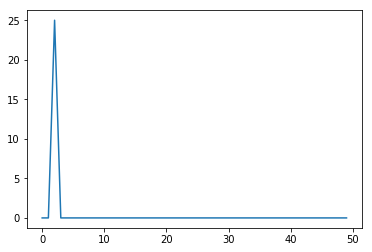

In [125]:
plot(magspec[0:50])

You should see something like the following: 

http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab11/images/spec1.png

If you don't, double-check your work or ask for help.

Note that the plot above still looks a little funny, like a triangle sitting at 2Hz instead of a single peak. You can change the type of plot to look more like the slides from class by using the `stem` function instead:

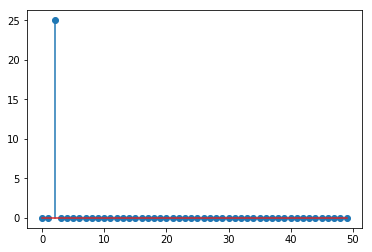

In [127]:
stem(magspec[0:50])
?stem
#Also, try "zooming in" further to verify that the peak is at 2 Hz, like:
#stem(spec[0:5])

__Step 6.__ Now repeat the process for a few more waveforms, all sampled at 100Hz for 1 second.

a. Create a variable `x2`, with an amplitude of 0.5, a frequency of 4Hz, and a phase offset of 0.

b. Sketch on paper what you expect the magnitude spectrum of `x2` to look like.

c. Create a variable `x3` which is the sum of `x1` and `x2`. 

d. Sketch what you expect the magnitude spectrum of `x3` to look like.

e. Compute the spectrum of `x2` and store it in the variable `spec2`.

f. Compute the spectrum of `x3` and store it in the variable `spec3`. 

g. Plot the magnitude spectra for `x2` and `x3`, remembering to use the `abs` function __and__ to plot the spectrum only for the frequencies from 0 to the Nyquist rate.

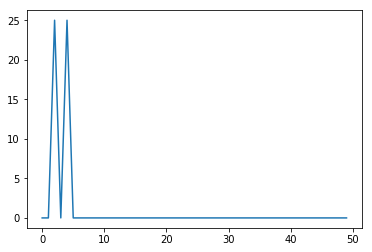

In [133]:
rate = 100
duration = 1
t = arange(0, duration, 1 / rate)
x2 = 0.5 * sin(2 * pi * t * 4)
x3 = x1 + x2
spec2 = fft.fft(x2)
spec3 = fft.fft(x3)
magspec2 = abs(spec2)
magspec3 = abs(spec3)
#plot(magspec2[0:50])
plot(magspec3[0:50])

<span style="color:red">
Make sure that your code-generated spectra look the same as your sketches. <br> Also make sure that your spectrum for `x3` looks the same as if you added the spectra for `x1` and `x2` together. <br> If not, raise your hand to talk with an instructor. 
</span>